## Introduction:
We're going to analyze a dataset about the westbound traffic on the I-94 Interstate highway.

Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weather features and holidays included for impacts on traffic volume.



## Goal:
The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.


### Data Dictionary:
|Feature name |Type |Description | 
|:-----|:-----|:-----|
|holiday |Categorical |US National holidays plus regional holiday, Minnesota State Fair|
|temp |Numeric Average temp in kelvin|
|rain_1h |Numeric |Amount in mm of rain that occurred in the hour|
|snow_1h |Numeric |Amount in mm of snow that occurred in the hour|
|clouds_all |Numeric |Percentage of cloud cover|
|weather_main |Categorical |Short textual description of the current weather|
|weather_description |Categorical |Longer textual description of the current weather|
|date_time |DateTime |Hour of the data collected in local CST time|
|traffic_volume |Numeric |Hourly I-94 ATR 301 reported westbound traffic volume|



### Resources:
https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns 
%matplotlib inline 

In [2]:
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')


In [3]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## Data Visualizations

Plot a histogram to examine the distribution of the traffic_volume column.

<font color='red'> Using Pandas method of Visualization 

<function matplotlib.pyplot.show(*args, **kw)>

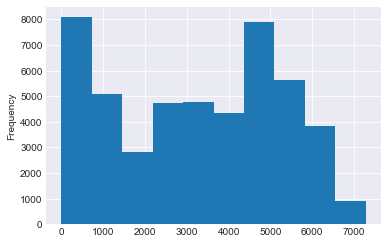

In [6]:
style.use('seaborn-darkgrid')
traffic['traffic_volume'].plot.hist()
plt.show

In [7]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

**Observations:**
- Between 2012-10-02 09:00 and 2018-09-30 23:00, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars.

- For 25% of the time, there were only 1,193 cars or fewer passing the station each hour. 
    - We can hypothosize that low traffic volume is because of night hours. 

- So lets corroborate our Hypothesis

##### Lets start by dividing the dataset into two parts:
- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [8]:
# transforming date_time to datetime 
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [9]:
# Dividing into daytime and nighttime hours

daytime = traffic[(traffic["date_time"].dt.hour >= 7) &
                  (traffic["date_time"].dt.hour < 19)].copy()
nighttime = traffic[(traffic['date_time'].dt.hour >= 19) |
                   (traffic['date_time'].dt.hour < 7)].copy() 

In [10]:
daytime.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [11]:
nighttime.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
10,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963


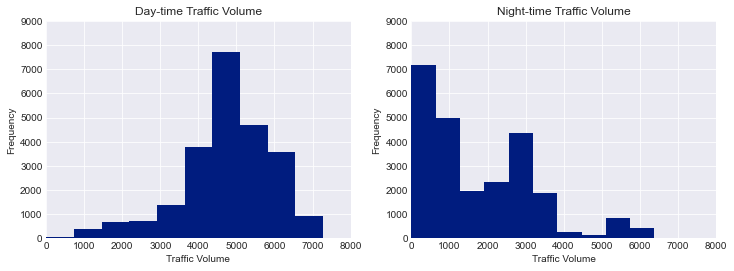

In [12]:
style.use('seaborn-dark-palette')
plt.figure(figsize = (12,4))

plt.subplot(1, 2, 1)
plt.hist(daytime['traffic_volume'])
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.title('Day-time Traffic Volume')
plt.ylim(0, 9000)
plt.xlim(0, 8000)


plt.subplot(1, 2, 2)
plt.hist(nighttime['traffic_volume'])
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.title('Night-time Traffic Volume')
plt.ylim(0, 9000)
plt.xlim(0, 8000)

plt.show()
         

In [13]:
daytime['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [14]:
nighttime['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

**Observations:**

- The distribution of traffic volume during the day is skewed towards the left. This means that most of the traffic volume values are high 

- Wheras the nighttime data is right skewed, i-e.,  most of the traffic volume values are low

**Inference:**
The traffic at night is generally light. As our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.

## Lets see how the traffic volume changed according to the following parameters
- Month
- Day of the week
- Time of day
- Weather 

### By Months

<font color='red'> we will use pd.GroupBy() method

In [15]:
# Lets create a new column in daytime DataFrame for months
daytime['month'] = daytime['date_time'].dt.month

# Lets group the dataset by the months
by_month = daytime.groupby('month').mean()

# Lets view it 
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

##### Lets Visualize the traffic volume by months 
<font color='red'> using pandas's visualization method

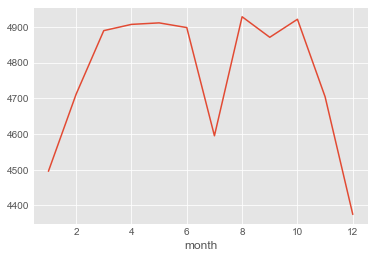

In [16]:
style.use('ggplot')
by_month['traffic_volume'].plot.line()

**Observations:**
- Months have an impact on the traffic volume
    - Jan, July, and December saw the lowest traffic volumes.
    - The rest of the months saw extra-ordinary high traffic volumes.
        - That hints towards some vacations being occured in the months of Jan, July and December.

### By Weekdays

<font color='red'> we will use pd.GroupBy() method

In [17]:
# Lets create a new column in daytime DataFrame for weekday
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek

# Lets group the dataset by the months
by_dayofweek = daytime.groupby('dayofweek').mean()

# Lets view it 
by_dayofweek['traffic_volume']

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

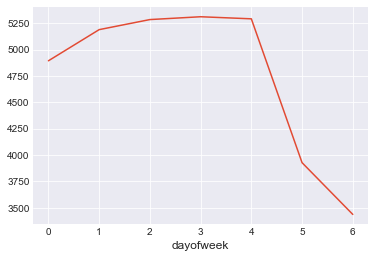

In [18]:
# Lets Visualize it using pandas Visulaization 
style.use('seaborn-darkgrid')
by_dayofweek['traffic_volume'].plot.line()

**Observations:**
- Traffic volume is highest during the week and lowest on Saturday and Sunday. 
- The lowest volume day is Sunday. 

Lets break the data into weekday vs weekend to see how the traffic volume changes by hour through the day.

### By hour of the day

In [19]:
daytime["hour"] = daytime["date_time"].dt.hour
# With 0: Monday, 1: Tuesday, ... 4: Friday
weekday = daytime.copy()[daytime["dayofweek"] <= 4]

# With 5: Saturdady and 6: Sunday
weekend = daytime.copy()[daytime["dayofweek"] > 4]

# Groupby Weekdays by hour
by_hour_weekday = weekday.groupby("hour").mean()

# Groupby Weekends by hour
by_hour_weekend = weekend.groupby("hour").mean()

##### Visualizing the traffic volume by hours on weekdays and weekends

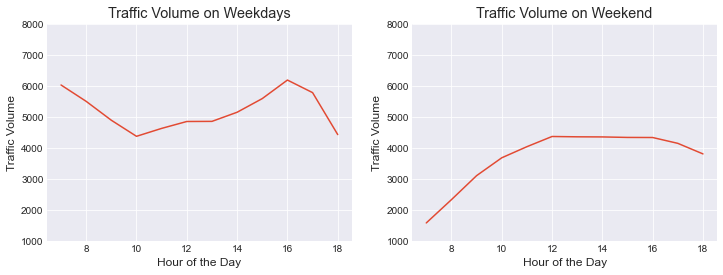

In [20]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(by_hour_weekday["traffic_volume"])
plt.ylim(1000, 8000)
plt.xlabel("Hour of the Day")
plt.ylabel("Traffic Volume")
plt.title("Traffic Volume on Weekdays")

plt.subplot(1,2,2)
plt.plot(by_hour_weekend["traffic_volume"])
plt.ylim(1000, 8000)
plt.xlabel("Hour of the Day")
plt.ylabel("Traffic Volume")
plt.title("Traffic Volume on Weekend")

plt.show()

**Observations:**
- As expected, Traffic volume is heavier on weekdays than the weekends
    - Peak hours at **weekdays** are around 6:00 A.M - 8:00 A.M and 3:30 P.M to 4:30 P.M.
    - There are no such peak hours on **weekends**, Traffic volume starts increasing gradually and remains nearly constant till the evening. 

### Weather

In [21]:
# Correlation with traffic_volume
daytime.corr()[['traffic_volume']]

,traffic_volume
temp,0.128317
rain_1h,0.003697
snow_1h,0.001265
clouds_all,-0.032932
traffic_volume,1.000000
month,-0.022337
dayofweek,-0.416453
hour,0.172704


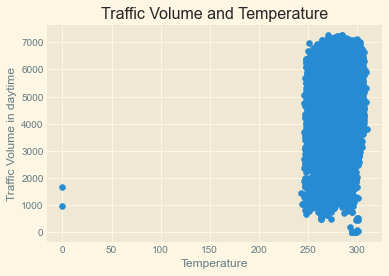

In [22]:
style.use('Solarize_Light2')
plt.scatter(daytime["temp"], daytime["traffic_volume"])
plt.xlabel("Temperature")
plt.ylabel("Traffic Volume in daytime")
plt.title("Traffic Volume and Temperature")
plt.show()

**Observation:**
- There are no impressive correlations between **numerical** columns associated with weather and the traffic volume
- Temperature column shows the highest correlation among the other features of around 0.128.

Its better that we do not disregard the weather columns altogether and look a bit deeper into them


##### Lets look into the "categorical" columns associated with weather 

In [25]:
style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

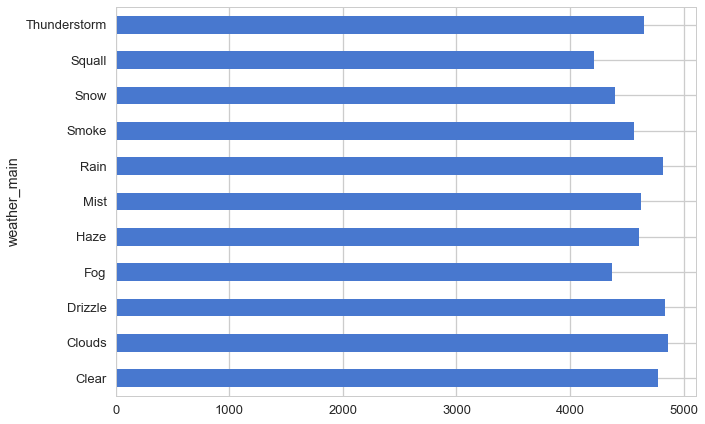

In [30]:
# Lets look into the main types of the weather 
style.use('seaborn-muted')
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.show()

Apparently, the traffic volume is not impacted by the weather. We could not find any heavy traffic indicator here as none of the categories in weather_main could garner the traffic volume exceeding 5000 cars

##### Let's also group by weather_description

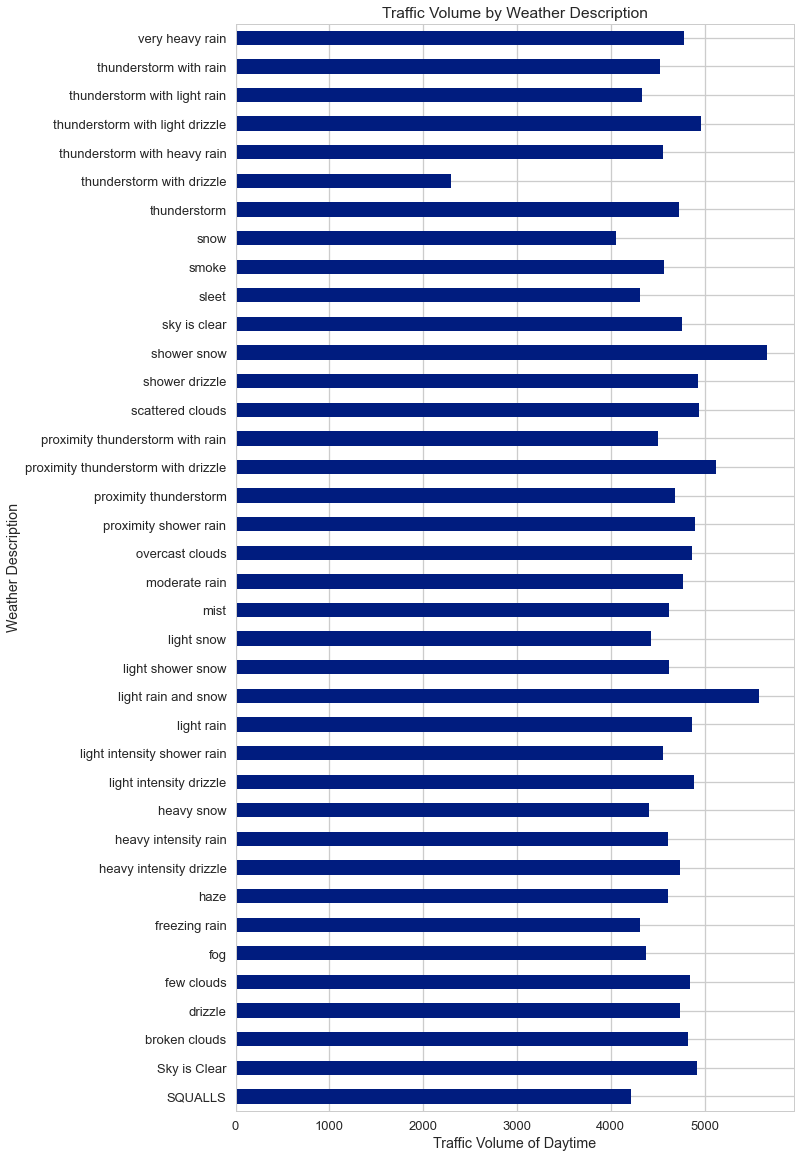

In [31]:
style.use('seaborn-dark-palette')
by_weather_description = daytime.groupby("weather_description").mean()

by_weather_description["traffic_volume"].plot.barh(figsize = (10, 20))
plt.xlabel ("Traffic Volume of Daytime")
plt.ylabel ("Weather Description")
plt.title ("Traffic Volume by Weather Description")
plt.show()

**Observations:**
We can see that there are three main weather types where traffic volume managed to exceed 5,000:

- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle

## Conclusion
The highest indicator of high traffic volume was time. Traffic volume is highest:

- In the daytime
- On weekdays (Monday - Friday)
- During rush hour (before 8am and around 4pm)